In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

39.14930358442132 97.33379715600347
-57.25220212395166 160.07442499854614
17.384046369050992 89.54521157792249
-8.630400792275424 170.8316306653192
19.95228511508573 -126.85857137891416
-35.11192163728281 158.48854644166653
-65.09412533061553 2.75145966093163
14.494475187016121 -113.34490041697899
-27.74660303130139 17.43893760737143
-55.21061545636599 153.0072636951615
61.511426664739844 -92.74099924119284
-11.61026958128997 -66.38397069786508
50.890948712219256 169.81863151231846
-70.44902774713108 -38.69902984909305
-79.14437364386839 -4.8441057781834616
-81.96774917555119 -141.26113066832966
18.707227724200507 -126.83079970168495
17.321086638129813 62.76299012875697
-12.6398467770818 62.23060426116032
1.9337480209485989 -164.02801285370793
17.84956937282645 41.88659302967156
45.73372197468737 -16.010026234593
26.61644513178608 25.353076771003742
28.652202338365356 -137.67876106797837
-55.79638178798209 -163.27282304809881
-13.605074640029102 -77.13899515958025
-32.950298346121926 4

64.37788641927213 112.2129046288191
-31.78997431262816 -26.76955629530542
-75.0249211229619 110.91961825319265
-86.79516979142782 -142.14866508057077
35.11174351582916 96.47323382207105
-62.49657581787361 -9.21558966012148
22.39701967360189 156.02305204308334
-59.809725737926485 -107.88011616838982
75.85004113299095 173.49646884415057
-75.08252411262507 20.861327232504777
51.63638249133962 121.97258177918962
54.79364452451003 -42.35163404338786
-61.881941721763226 -103.94276189316061
14.854959865281103 148.67053189267176
15.706365637012624 -132.23079871153854
-52.43567908770386 25.325271104257638
-51.567416692633934 131.91515280242822
38.064010208523 -104.26232401233295
-23.881874252483343 51.63508994511031
81.6503863705669 172.4988880096351
-38.046407773093556 -134.95391961445483
72.0821639596881 -52.06292538472486
37.43141978486307 103.17288233118387
-60.01912873200737 139.8752322790579
58.36711378315704 67.76639876320908
-85.84620869201991 -111.06911531681752
85.95327127365096 9.563

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | yumen
Processing Record 2 of Set 13 | tuatapere
Processing Record 3 of Set 13 | paradwip
City not found. Skipping...
Processing Record 4 of Set 13 | lata
Processing Record 5 of Set 13 | guerrero negro
Processing Record 6 of Set 13 | port macquarie
Processing Record 7 of Set 13 | hermanus
Processing Record 8 of Set 13 | cabo san lucas
Processing Record 9 of Set 13 | oranjemund
Processing Record 10 of Set 13 | hobart
Processing Record 11 of Set 13 | thompson
Processing Record 12 of Set 13 | riberalta
Processing Record 13 of Set 13 | nikolskoye
Processing Record 14 of Set 13 | ushuaia
Processing Record 15 of Set 13 | mataura
Processing Record 16 of Set 13 | sur
Processing Record 17 of Set 13 | grand gaube
Processing Record 18 of Set 13 | samalaeulu
City not found. Skipping...
Processing Record 19 of Set 13 | abha
Processing Record 20 of Set 13 | muros
Processing Record 21 of Set 13 | jalu
Processin

Processing Record 33 of Set 16 | deshna
City not found. Skipping...
Processing Record 34 of Set 16 | flinders
Processing Record 35 of Set 16 | verkhoyansk
Processing Record 36 of Set 16 | samarai
Processing Record 37 of Set 16 | caruray
Processing Record 38 of Set 16 | berdigestyakh
Processing Record 39 of Set 16 | bayan
Processing Record 40 of Set 16 | iqaluit
Processing Record 41 of Set 16 | bac lieu
Processing Record 42 of Set 16 | lasa
Processing Record 43 of Set 16 | ambodifototra
City not found. Skipping...
Processing Record 44 of Set 16 | dikson
Processing Record 45 of Set 16 | muzaffarabad
Processing Record 46 of Set 16 | mar del plata
Processing Record 47 of Set 16 | usinsk
Processing Record 48 of Set 16 | asekeyevo
Processing Record 49 of Set 16 | mamallapuram
Processing Record 50 of Set 16 | smithers
Processing Record 1 of Set 17 | nagato
Processing Record 2 of Set 17 | naze
Processing Record 3 of Set 17 | srednekolymsk
Processing Record 4 of Set 17 | cherskiy
Processing Rec

Processing Record 16 of Set 20 | boende
Processing Record 17 of Set 20 | trelew
Processing Record 18 of Set 20 | saiha
Processing Record 19 of Set 20 | garoua
Processing Record 20 of Set 20 | touba
Processing Record 21 of Set 20 | port keats
Processing Record 22 of Set 20 | ugoofaaru
Processing Record 23 of Set 20 | manta
Processing Record 24 of Set 20 | bowen
Processing Record 25 of Set 20 | ferme-neuve
Processing Record 26 of Set 20 | tezu
Processing Record 27 of Set 20 | longyearbyen
Processing Record 28 of Set 20 | moose factory
Processing Record 29 of Set 20 | conde
Processing Record 30 of Set 20 | egvekinot
Processing Record 31 of Set 20 | villa rica
Processing Record 32 of Set 20 | vysokogornyy
Processing Record 33 of Set 20 | acajutla
Processing Record 34 of Set 20 | beringovskiy
Processing Record 35 of Set 20 | necochea
Processing Record 36 of Set 20 | honningsvag
Processing Record 37 of Set 20 | cortez
Processing Record 38 of Set 20 | puerto carreno
Processing Record 39 of Se

Processing Record 4 of Set 24 | ust-kamchatsk
City not found. Skipping...
Processing Record 5 of Set 24 | hoshcha
Processing Record 6 of Set 24 | kozhva
Processing Record 7 of Set 24 | atherton
Processing Record 8 of Set 24 | uroteppa
City not found. Skipping...
Processing Record 9 of Set 24 | salym
Processing Record 10 of Set 24 | rio gallegos
Processing Record 11 of Set 24 | umm kaddadah
Processing Record 12 of Set 24 | jocon
Processing Record 13 of Set 24 | dicabisagan
Processing Record 14 of Set 24 | abeche
Processing Record 15 of Set 24 | mahon
Processing Record 16 of Set 24 | tigil
Processing Record 17 of Set 24 | iquitos
Processing Record 18 of Set 24 | nemuro
Processing Record 19 of Set 24 | dobrinka
Processing Record 20 of Set 24 | rorvik
Processing Record 21 of Set 24 | balkanabat
Processing Record 22 of Set 24 | dali
Processing Record 23 of Set 24 | okhotsk
Processing Record 24 of Set 24 | tecolutla
Processing Record 25 of Set 24 | bosobolo
Processing Record 26 of Set 24 | i

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yumen,CN,2022-04-20 20:49:07,40.2833,97.2000,48.58,16,100,7.23
1,Tuatapere,NZ,2022-04-20 20:49:07,-46.1333,167.6833,58.96,97,100,3.69
2,Lata,PT,2022-04-20 20:49:07,40.1629,-8.3327,54.07,82,2,6.08
3,Guerrero Negro,MX,2022-04-20 20:46:18,27.9769,-114.0611,69.19,57,58,21.92
4,Port Macquarie,AU,2022-04-20 20:49:08,-31.4333,152.9167,55.89,80,24,4.94
5,Hermanus,ZA,2022-04-20 20:49:08,-34.4187,19.2345,63.30,83,100,1.90
6,Cabo San Lucas,MX,2022-04-20 20:45:23,22.8909,-109.9124,78.06,71,1,7.00
7,Oranjemund,NA,2022-04-20 20:49:09,-28.5500,16.4333,63.90,62,8,2.75
8,Hobart,AU,2022-04-20 20:48:55,-42.8794,147.3294,46.26,76,40,6.91
9,Thompson,CA,2022-04-20 20:49:09,55.7435,-97.8558,33.96,51,75,11.50


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

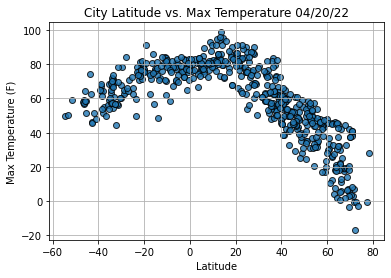

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

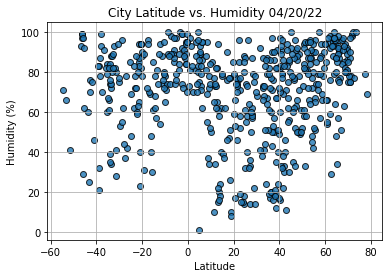

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

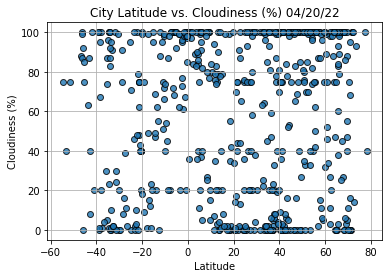

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

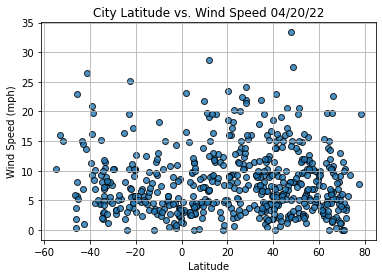

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yumen,CN,2022-04-20 20:49:07,40.2833,97.2000,48.58,16,100,7.23
2,Lata,PT,2022-04-20 20:49:07,40.1629,-8.3327,54.07,82,2,6.08
3,Guerrero Negro,MX,2022-04-20 20:46:18,27.9769,-114.0611,69.19,57,58,21.92
6,Cabo San Lucas,MX,2022-04-20 20:45:23,22.8909,-109.9124,78.06,71,1,7.00
9,Thompson,CA,2022-04-20 20:49:09,55.7435,-97.8558,33.96,51,75,11.50
...,...,...,...,...,...,...,...,...,...
552,Marsaxlokk,MT,2022-04-20 21:04:01,35.8419,14.5431,67.08,72,0,19.57
553,Venafro,IT,2022-04-20 21:04:01,41.4834,14.0451,59.85,86,100,5.50
554,Whitehorse,CA,2022-04-20 20:59:58,60.7161,-135.0538,37.02,55,75,9.22
555,Broome,US,2022-04-20 21:04:01,42.2506,-75.8330,53.89,46,0,10.36


In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yumen,CN,2022-04-20 20:49:07,40.2833,97.2000,48.58,16,100,7.23
2,Lata,PT,2022-04-20 20:49:07,40.1629,-8.3327,54.07,82,2,6.08
3,Guerrero Negro,MX,2022-04-20 20:46:18,27.9769,-114.0611,69.19,57,58,21.92
6,Cabo San Lucas,MX,2022-04-20 20:45:23,22.8909,-109.9124,78.06,71,1,7.00
9,Thompson,CA,2022-04-20 20:49:09,55.7435,-97.8558,33.96,51,75,11.50


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

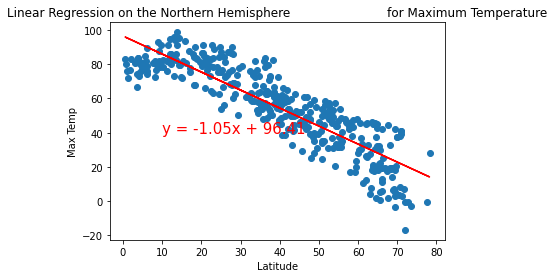

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

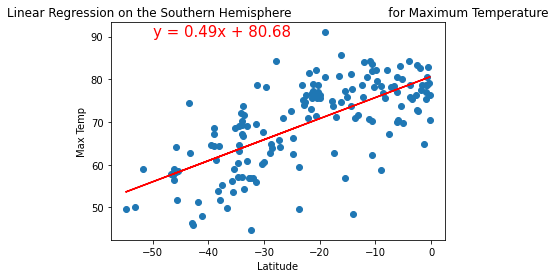

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

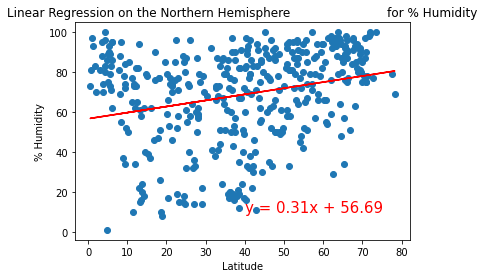

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

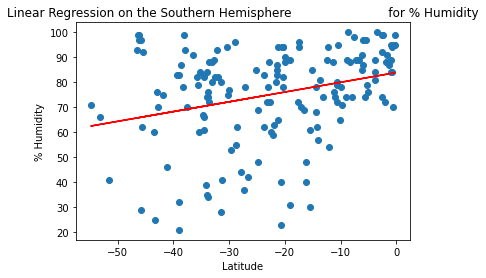

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

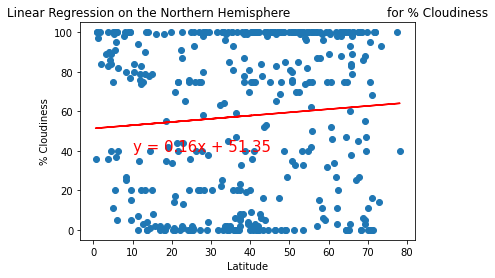

In [31]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

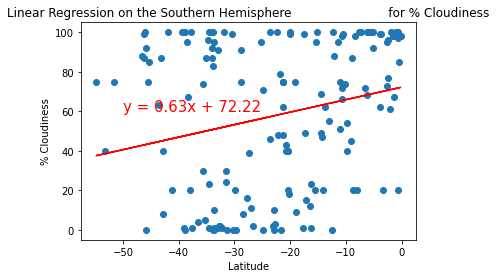

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

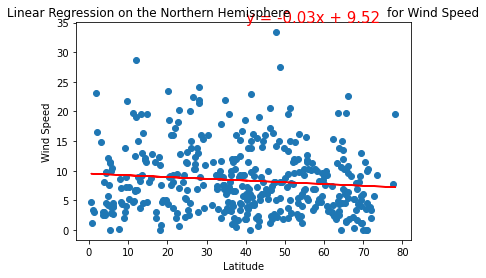

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

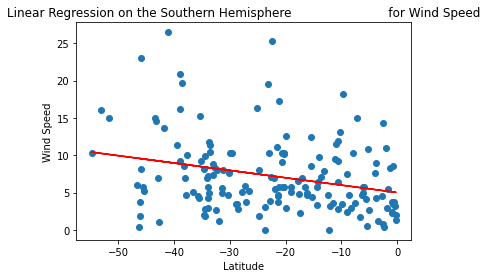

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))